In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
#flight_data = pd.read_csv("flights_sample_3m.csv")
#weather_data =pd.read_csv("WeatherEvents_Jan2016-Dec2022.csv")

# Load the datasets
flight_data = pd.read_csv("flights_sample_3m.csv")
weather_data = pd.read_csv("WeatherEvents_Jan2016-Dec2022.csv")

# Display basic information for flight data
print("Flight Data Information:")
print(f'Shape: {flight_data.shape}\n')  
print(f'Dtypes:\n{flight_data.dtypes}\n')  
print(f'First 5 Rows:\n{flight_data.head()}\n') 

# Display basic information for weather data
print("Weather Data Information:")
print(f'Shape: {weather_data.shape}\n')  
print(f'Dtypes:\n{weather_data.dtypes}\n')  
print(f'First 5 Rows:\n{weather_data.head()}')  

Flight Data Information:
Shape: (3000000, 32)

Dtypes:
FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64


In [3]:
# Check for missing values in flight_data
print("\nMissing Values in Flight Data:")
print(flight_data.isnull().sum())

# Check for missing values in weather_data
print("\nMissing Values in Weather Data:")
print(weather_data.isnull().sum())


#start by dropping any duplicates 
flight_data_postDrop = flight_data.drop_duplicates()

weather_data_postDrop = weather_data.drop_duplicates()

# Convert date columns to datetime format
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'])
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)']) 
weather_data['EndTime(UTC)'] = pd.to_datetime(weather_data['EndTime(UTC)'])  

# # Check the conversions
# print(flight_data['FL_DATE'].head())
# print(weather_data[['StartTime(UTC)', 'EndTime(UTC)']].head())




Missing Values in Flight Data:
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER      

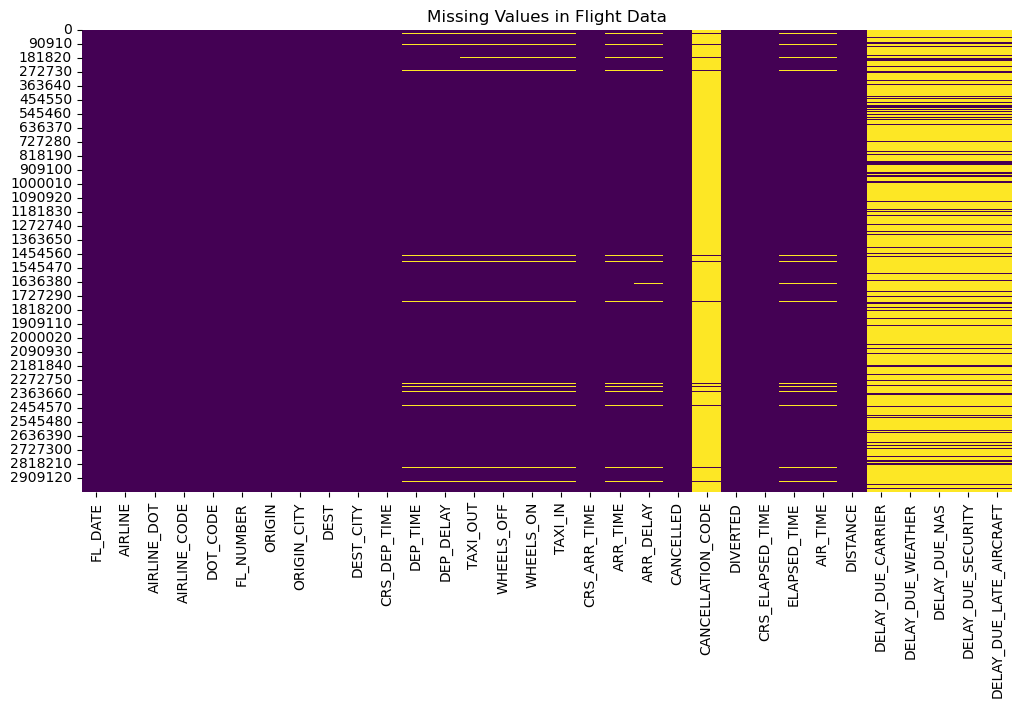

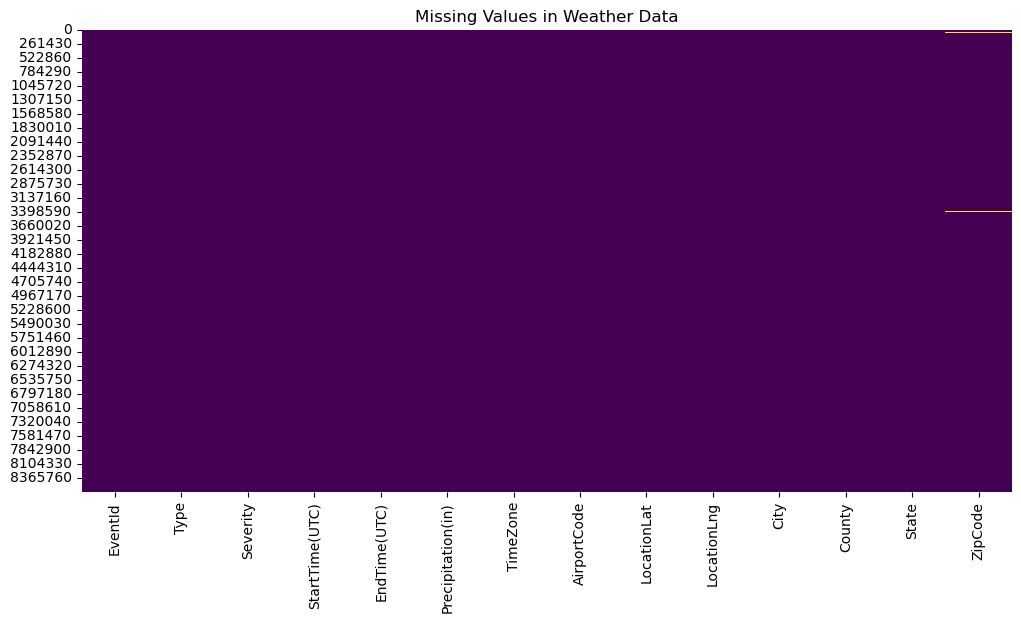

In [4]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data')
plt.show()


Shape after dropping 2023 flights: (2536516, 32)


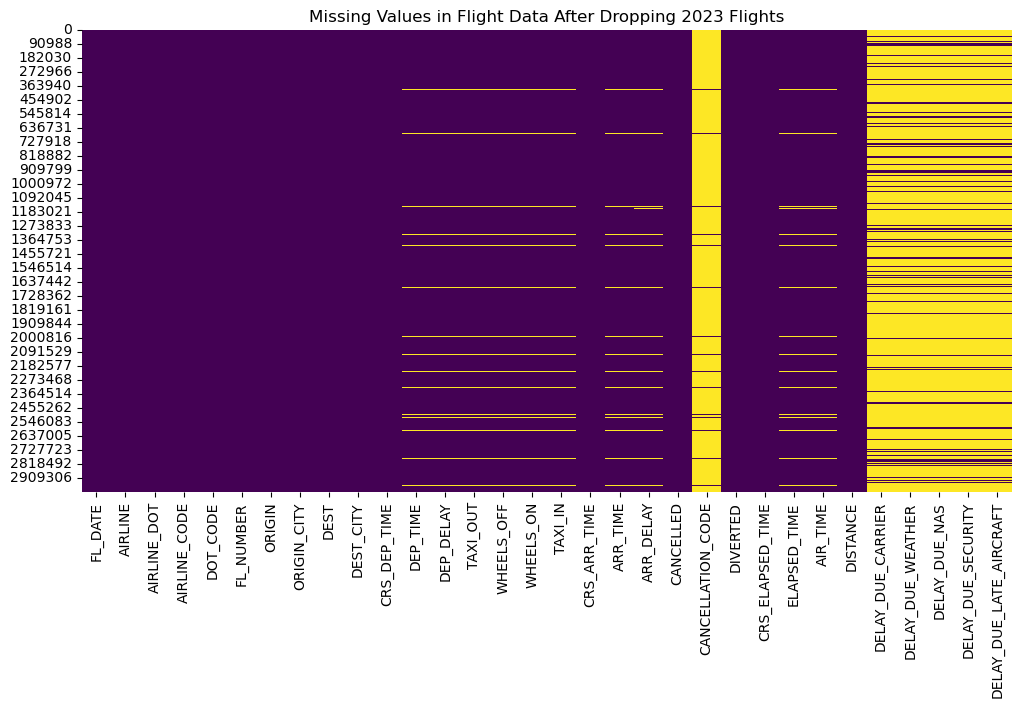

Shape of weather data after dropping before 2019: (4885129, 14)


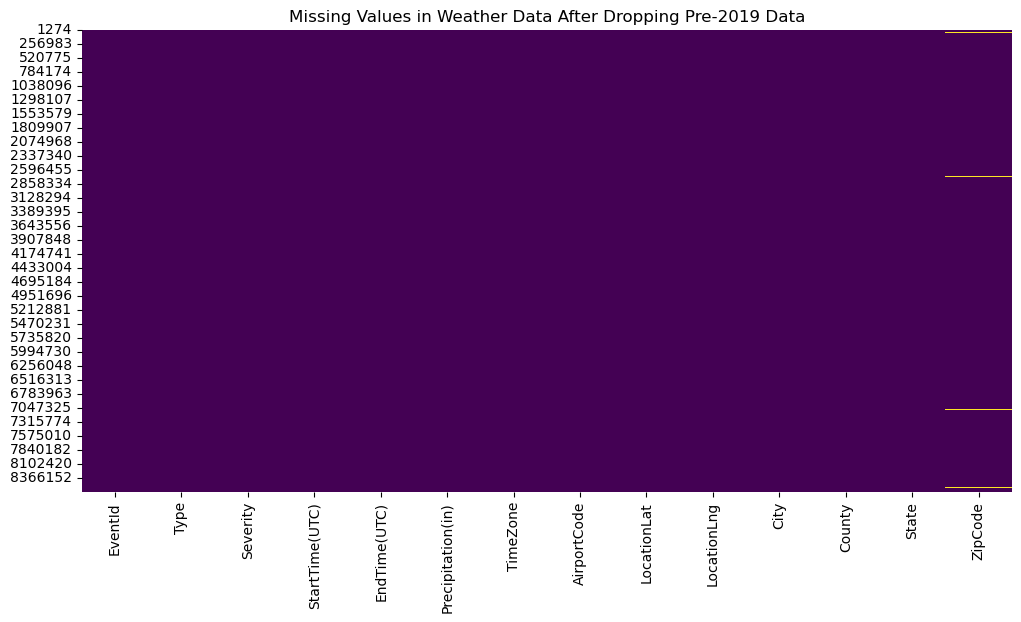

In [5]:
#the weather data set that I found is from 19-23 and weather events is from 16-22, lets remvoe extra data that doesnt overlap in these data sets 

#drop the extra data from 23 on the flight details
# Ensure FL_DATE is in datetime format
flight_data_postDrop['FL_DATE'] = pd.to_datetime(flight_data_postDrop['FL_DATE'])

# Drop rows where FL_DATE is in the year 2023
flight_data_postDrop = flight_data_postDrop[flight_data_postDrop['FL_DATE'].dt.year != 2023]

# Check the shape of the DataFrame after the drop
print(f'Shape after dropping 2023 flights: {flight_data_postDrop.shape}')

# Visualize missing data after dropping 2023 flights
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_postDrop.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data After Dropping 2023 Flights')
plt.show()

#shouldnt expect much change in missing values but here we are 

#drop weather data brefore 2019
# Ensure StartTime(UTC) is in datetime format
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)'])

# Drop rows where the year is before 2019
weather_data_filtered = weather_data[weather_data['StartTime(UTC)'].dt.year >= 2019]

# Check the shape of the DataFrame after the drop
print(f'Shape of weather data after dropping before 2019: {weather_data_filtered.shape}')

# Visualize missing data in weather_data_filtered
plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_filtered.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data After Dropping Pre-2019 Data')
plt.show()


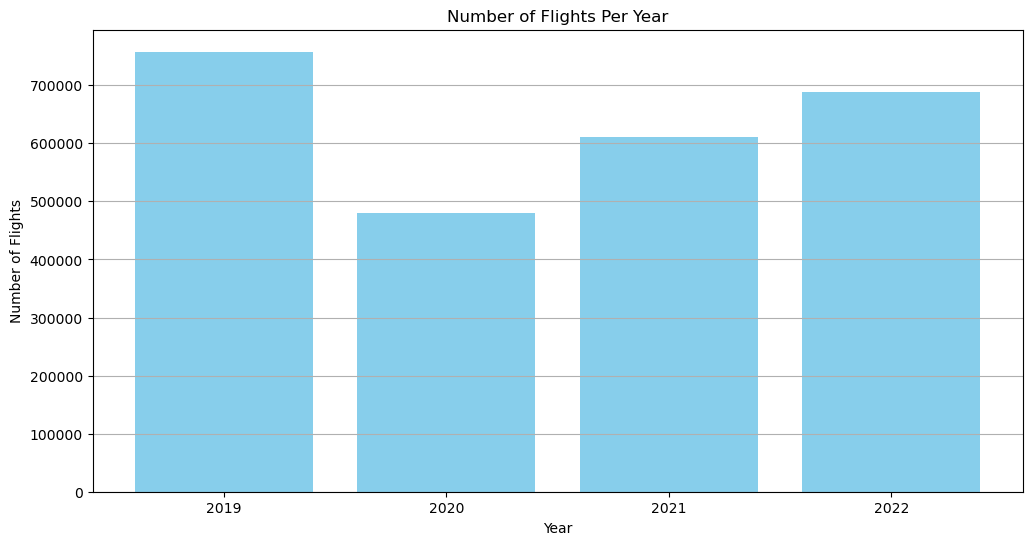

C:\Users\goderisd\AppData\Local\Temp\ipykernel_13988\2832770683.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered['StartTime(UTC)'] = pd.to_datetime(weather_data_filtered['StartTime(UTC)'])
C:\Users\goderisd\AppData\Local\Temp\ipykernel_13988\2832770683.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered['Year'] = weather_data_filtered['StartTime(UTC)'].dt.year


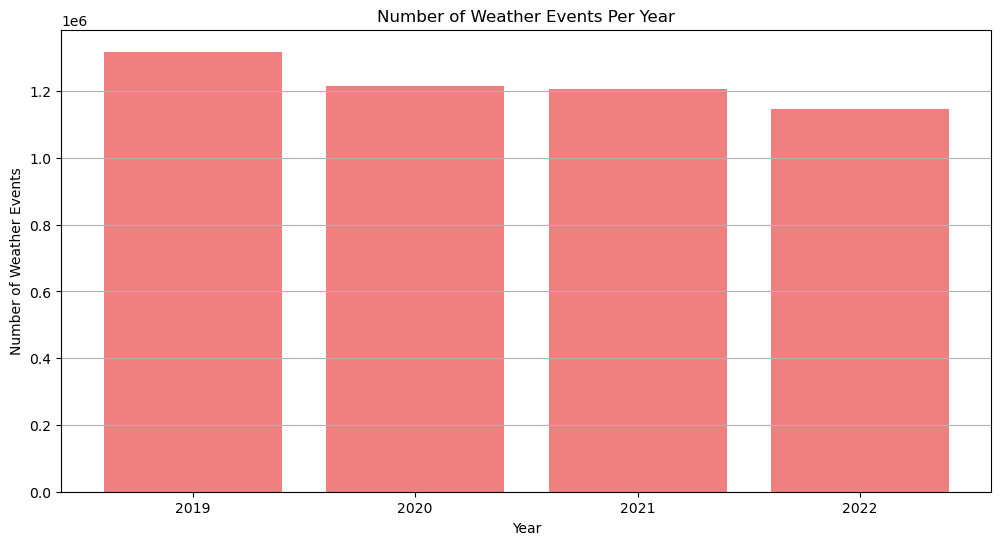

In [6]:
#validate that the drops worked correctly for the overlappign years

# Assuming flight_data_postDrop is your processed DataFrame with no missing values in FL_DATE
flight_data_postDrop['FL_DATE'] = pd.to_datetime(flight_data_postDrop['FL_DATE'])

flight_data_postDrop['Year'] = flight_data_postDrop['FL_DATE'].dt.year

# Count the number of flights per year
flights_per_year = flight_data_postDrop['Year'].value_counts().sort_index()

# Plot the number of flights per year
plt.figure(figsize=(12, 6))
plt.bar(flights_per_year.index, flights_per_year.values, color='skyblue')
plt.title('Number of Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(flights_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(axis='y')
plt.show()


#validate weather 

weather_data_filtered['StartTime(UTC)'] = pd.to_datetime(weather_data_filtered['StartTime(UTC)'])

weather_data_filtered['Year'] = weather_data_filtered['StartTime(UTC)'].dt.year

weather_events_per_year = weather_data_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(weather_events_per_year.index, weather_events_per_year.values, color='lightcoral')
plt.title('Number of Weather Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Weather Events')
plt.xticks(weather_events_per_year.index)  # Ensure all years are shown on the x-axis
plt.grid(axis='y')
plt.show()


In [7]:
#now that our data sets are in better shape lets check in and see how the number of missing values, and we will try to determine an imputation
#mode before we start to do some visualization and some predictions 

missing_flight_data = flight_data_postDrop.isnull().sum().sum()

missing_weather_data = weather_data_filtered.isnull().sum().sum()


print(f'Total missing values in flight_data_postDrop: {missing_flight_data}')
print(f'Total missing values in weather_data_filtered: {missing_weather_data}')





Total missing values in flight_data_postDrop: 13731453
Total missing values in weather_data_filtered: 51478


**HI GREGG PLEASE READ HERE**

I included this comment in my read me as well.  I realized as I was working on my visualizations that I messed up my data because i didnt need to impute it.  The missing values corrispoinded to the cancelliation of the flights, in light of this i altered my approach from here to the next bold comment that reads "Old code here".  I left the program that I wrote in here becuase i know part of the instructio nwas to do some advacned imputation for handling missing data, and i spent a lot of time on it :).  Well I have a lot of KNN imputation below to prove to you that i can do it :), but i wont be using it for my visualition.

In [10]:
#handle catagorical data
# Renaming the numeric values to categorical in columns Cancelled and Diverted 
flight_data_postDrop['CANCELLED'] = flight_data_postDrop['CANCELLED'].replace([1, 0], ["CANCELLED", "NOT CANCELLED"])
flight_data_postDrop['DIVERTED'] = flight_data_postDrop['DIVERTED'].replace([1, 0], ["DIVERTED", "NOT DIVERTED"])

In [11]:
# Check for missing values in DEP_TIME and present values in CANCELLATION_CODE
overlap_condition = flight_data_postDrop['DEP_TIME'].isna() & flight_data_postDrop['CANCELLATION_CODE'].notna()


overlap_count = overlap_condition.sum()

print(f"Number of rows where DEP_TIME is missing and CANCELLATION_CODE is present: {overlap_count}")


overlapping_rows = flight_data_postDrop[overlap_condition]
print("Rows with missing DEP_TIME and present CANCELLATION_CODE:")
print(overlapping_rows)

Number of rows where DEP_TIME is missing and CANCELLATION_CODE is present: 70080
Rows with missing DEP_TIME and present CANCELLATION_CODE:
           FL_DATE                 AIRLINE                 AIRLINE_DOT  \
14      2020-04-07  Southwest Airlines Co.  Southwest Airlines Co.: WN   
45      2022-01-02        Republic Airline        Republic Airline: YX   
80      2020-04-20  Southwest Airlines Co.  Southwest Airlines Co.: WN   
191     2021-12-31    Alaska Airlines Inc.    Alaska Airlines Inc.: AS   
236     2020-04-14  Southwest Airlines Co.  Southwest Airlines Co.: WN   
...            ...                     ...                         ...   
2999776 2021-07-05   SkyWest Airlines Inc.   SkyWest Airlines Inc.: OO   
2999779 2019-06-17       PSA Airlines Inc.       PSA Airlines Inc.: OH   
2999865 2021-10-22   SkyWest Airlines Inc.   SkyWest Airlines Inc.: OO   
2999910 2020-04-08           Allegiant Air           Allegiant Air: G4   
2999943 2020-03-30  American Airlines Inc.  Ame

In [ ]:
#looking at the airline data set now lets begin to impute some of hte important missing values 

#air time first:

flight_data_sorted_airTime = flight_data_postDrop.sort_values(by='AIR_TIME', ascending=True)

# Display the top rows to visually inspect the sorted data
#print(flight_data_sorted_airTime[['AIR_TIME', 'DISTANCE', 'ORIGIN', 'DEST']].head(20))

#sort by iuncreaseing distance:
# Sort the DataFrame by DISTANCE in ascending order
flight_data_sorted_by_distance = flight_data_postDrop.sort_values(by='DISTANCE', ascending=True)

# Display the first 10 rows (head) after sorting
print("Head of sorted DataFrame (by increasing DISTANCE):")
print(flight_data_sorted_by_distance[['DISTANCE', 'AIR_TIME', 'ORIGIN', 'DEST']].head(10))

# Display the last 10 rows (tail) after sorting
print("\nTail of sorted DataFrame (by increasing DISTANCE):")
print(flight_data_sorted_by_distance[['DISTANCE', 'AIR_TIME', 'ORIGIN', 'DEST']].tail(10))


# Visualize missing data in the sorted flight_data by increasing DISTANCE
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_sorted_by_distance.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Flight Data Sorted by Increasing DISTANCE')
plt.show()


In [ ]:
#WIth the matrix ordered by distance we should be able to assuem taht we can impute air time with KNN 

# from sklearn.impute import KNNImputer
# from joblib import Parallel, delayed


# Set chunk size (e.g., split into 4 chunks or adjust based on your CPU cores)
# chunk_size = len(flight_data_sorted_by_distance) // 4  # Splitting data into 4 chunks

# Define function to perform KNN imputation on a chunk
# def knn_impute_chunk(data_chunk):
#     impute_columns = ['DISTANCE', 'AIR_TIME']  # We focus on imputing the 'AIR_TIME' column using 'DISTANCE'
    
#     # Create a copy of only the columns we are imputing
#     flight_data_impute = data_chunk[impute_columns].copy()
    
#     # Initialize the KNNImputer with 5 nearest neighbors
#     knn_imputer = KNNImputer(n_neighbors=5)
    
#     # Perform the imputation
#     imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    
#     # Replace the 'AIR_TIME' column in the original chunk with the imputed values
#     data_chunk['AIR_TIME'] = imputed_chunk[:, 1]
    
#     # Return the imputed chunk
#     return data_chunk

# Split the dataset into chunks based on the chunk size
# chunks = [flight_data_sorted_by_distance.iloc[i:i + chunk_size] for i in range(0, len(flight_data_sorted_by_distance), chunk_size)]

# Perform parallel imputation using joblib to parallelize over multiple CPU cores
# imputed_chunks = Parallel(n_jobs=-1)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

# Concatenate the imputed chunks back together into a single DataFrame
# flight_data_imputed_full = pd.concat(imputed_chunks)

# Check the result by printing the first few and last few rows of the imputed DataFrame
# print(flight_data_imputed_full[['DISTANCE', 'AIR_TIME']].head())  # Print the head of the DataFrame
# print(flight_data_imputed_full[['DISTANCE', 'AIR_TIME']].tail())  # Print the tail of the DataFrame


#used Chatgpt 4.0 on OCt 11th at 8:35 am to help wit hteh sytanx on the KNN imputer 
#also used it to help wit hte hexecution time, on sytanx for splitting the data into chunks to try to speed up execution
#and using mutliple cpu cores

#try a different way KNN is too computationally expensive for my PC lol 

In [ ]:
#linear regression imputatation

#from sklearn.linear_model import LinearRegression

# Select the rows where AIR_TIME is not missing
#train_data = flight_data_sorted_by_distance.dropna(subset=['AIR_TIME'])

# Define the features and target for the linear regression
#X_train = train_data[['DISTANCE']]  # Feature: DISTANCE
#y_train = train_data['AIR_TIME']    # Target: AIR_TIME

# Train the linear regression model
#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)

# Select the rows where AIR_TIME is missing
#missing_data = flight_data_sorted_by_distance[flight_data_sorted_by_distance['AIR_TIME'].isna()]

# Predict AIR_TIME for the missing values using DISTANCE
#X_missing = missing_data[['DISTANCE']]
#predicted_air_time = lr_model.predict(X_missing)

# Fill the missing AIR_TIME values with the predicted values
#flight_data_sorted_by_distance.loc[flight_data_sorted_by_distance['AIR_TIME'].isna(), 'AIR_TIME'] = predicted_air_time

# Check the result: print head and tail
#print(flight_data_sorted_by_distance[['DISTANCE', 'AIR_TIME']].head())
#print(flight_data_sorted_by_distance[['DISTANCE', 'AIR_TIME']].tail())


#also far too expensive ofr my PC 


In [ ]:
#try a sampling method for the air time 
# Sample values from existing AIR_TIME where DISTANCE is similar to missing values
#def sample_impute(row):
#    if pd.isnull(row['AIR_TIME']):
 #       return flight_data_sorted_by_distance['AIR_TIME'][flight_data_sorted_by_distance['DISTANCE'].between(row['DISTANCE']-10, row['DISTANCE']+10)].sample(n=1).values[0]
#    return row['AIR_TIME']

#flight_data_sorted_by_distance['AIR_TIME'] = flight_data_sorted_by_distance.apply(sample_impute, axis=1)


**GOING TO JUST LOOK YEAR BY YEAR THESE ADVANCED IMPUTATION TECHNIQUES ARE KILLING MY PC**

In [ ]:
#extract dates from distance matrix 
flight_data_sorted_by_distance['FL_DATE'] = pd.to_datetime(flight_data_sorted_by_distance['FL_DATE'])


flight_data_sorted_by_distance['Year'] = flight_data_sorted_by_distance['FL_DATE'].dt.year

# Split the DataFrame into a dictionary of DataFrames, one for each year
flight_data_by_year = {
    year: flight_data_sorted_by_distance[flight_data_sorted_by_distance['Year'] == year].sort_values(by='DISTANCE') 
    for year in flight_data_sorted_by_distance['Year'].unique()
}
# re sort by distance 

for year, df in flight_data_by_year.items():
    print(f"Year: {year}, Number of entries: {len(df)}")
    
weather_data_filtered['StartTime(UTC)'] = pd.to_datetime(weather_data_filtered['StartTime(UTC)'])


weather_data_filtered['Year'] = weather_data_filtered['StartTime(UTC)'].dt.year


weather_data_by_year = {year: weather_data_filtered[weather_data_filtered['Year'] == year] 
                         for year in weather_data_filtered['Year'].unique()}


for year, df in weather_data_by_year.items():
    print(f"Year: {year}, Number of entries: {len(df)}")

In [ ]:
#validate the indivd, years are sorted by distacne 
year_to_plot = 2022


flight_data_year = flight_data_by_year[year_to_plot].sort_values(by='DISTANCE')

# Plotting DISTANCE vs AIR_TIME
plt.figure(figsize=(12, 6))
plt.scatter(flight_data_year['DISTANCE'], flight_data_year['AIR_TIME'], alpha=0.5, color='blue')
plt.title(f'Air Time vs Distance for Year {year_to_plot}')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.grid()
plt.show()

#looks good now we can impute using KNN per year 

In [ ]:
#KNN for airtime for just 2022
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Access the flight data for 2022 from the split DataFrames
flight_data_2022 = flight_data_by_year[2022]  


chunk_size = len(flight_data_2022) // 4 

# Define function to perform KNN imputation on a chunk
def knn_impute_chunk(data_chunk):
    impute_columns = ['DISTANCE', 'AIR_TIME']  
    

    flight_data_impute = data_chunk[impute_columns].copy()
    

    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Perform the imputation
    imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    

    data_chunk['AIR_TIME'] = imputed_chunk[:, 1]
    
    # Return the imputed chunk
    return data_chunk

# Split the dataset into chunks based on the chunk size
chunks = [flight_data_2022.iloc[i:i + chunk_size] for i in range(0, len(flight_data_2022), chunk_size)]

# Perform parallel imputation using joblib to parallelize over multiple CPU cores
imputed_chunks = Parallel(n_jobs=-1)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

# Concatenate the imputed chunks back together into a single DataFrame
flight_data_imputed_2022 = pd.concat(imputed_chunks)


#used Chatgpt 4.0 on OCt 11th at 11 am to help adjust the syntax from above to make it work for just 2022 

#used it also to duplicate the syntax for the remaining years for hte air time imputation.

In [ ]:
# Visualize missing data after imputation
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_imputed_2022.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in 2022 Flight Data After KNN Imputation for AIR_TIME')
plt.show()

In [ ]:
#repeat for 2019:
# Access the flight data for 2019 from the split DataFrames
flight_data_2019 = flight_data_by_year[2019]  

chunk_size = len(flight_data_2019) // 4 

def knn_impute_chunk(data_chunk):
    impute_columns = ['DISTANCE', 'AIR_TIME']
    
    flight_data_impute = data_chunk[impute_columns].copy()
    
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Perform the imputation
    imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    
    data_chunk['AIR_TIME'] = imputed_chunk[:, 1]
    
    # Return the imputed chunk
    return data_chunk

# Split the dataset into chunks based on the chunk size
chunks = [flight_data_2019.iloc[i:i + chunk_size] for i in range(0, len(flight_data_2019), chunk_size)]

# Perform parallel imputation using joblib to parallelize over multiple CPU cores
imputed_chunks_2019 = Parallel(n_jobs=-1)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

flight_data_imputed_2019 = pd.concat(imputed_chunks_2019)


In [ ]:
#2020:

flight_data_2020 = flight_data_by_year[2020]  


chunk_size = len(flight_data_2020) // 4  

# Define function to perform KNN imputation on a chunk
def knn_impute_chunk(data_chunk):
    impute_columns = ['DISTANCE', 'AIR_TIME'] 
    
    flight_data_impute = data_chunk[impute_columns].copy()
    
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Perform the imputation
    imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    
    data_chunk['AIR_TIME'] = imputed_chunk[:, 1]
    
    # Return the imputed chunk
    return data_chunk

# Split the dataset into chunks based on the chunk size
chunks = [flight_data_2020.iloc[i:i + chunk_size] for i in range(0, len(flight_data_2020), chunk_size)]

# Perform parallel imputation using joblib to parallelize over multiple CPU cores
imputed_chunks_2020 = Parallel(n_jobs=-1)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

# Concatenate the imputed chunks back together into a single DataFrame
flight_data_imputed_2020 = pd.concat(imputed_chunks_2020)


In [ ]:
#21:
# Access the flight data for 2021 from the split DataFrames
flight_data_2021 = flight_data_by_year[2021]  # Assuming flight_data_by_year is your dictionary of DataFrames

# Set chunk size (e.g., split into 4 chunks or adjust based on your CPU cores)
chunk_size = len(flight_data_2021) // 4  # Splitting data into 4 chunks

# Define function to perform KNN imputation on a chunk
def knn_impute_chunk(data_chunk):
    impute_columns = ['DISTANCE', 'AIR_TIME']  # We focus on imputing the 'AIR_TIME' column using 'DISTANCE'
    
    # Create a copy of only the columns we are imputing
    flight_data_impute = data_chunk[impute_columns].copy()
    
    # Initialize the KNNImputer with 5 nearest neighbors
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Perform the imputation
    imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    
    # Replace the 'AIR_TIME' column in the original chunk with the imputed values
    data_chunk['AIR_TIME'] = imputed_chunk[:, 1]
    
    # Return the imputed chunk
    return data_chunk

# Split the dataset into chunks based on the chunk size
chunks = [flight_data_2021.iloc[i:i + chunk_size] for i in range(0, len(flight_data_2021), chunk_size)]

# Perform parallel imputation using joblib to parallelize over multiple CPU cores
imputed_chunks_2021 = Parallel(n_jobs=-1)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

# Concatenate the imputed chunks back together into a single DataFrame
flight_data_imputed_2021 = pd.concat(imputed_chunks_2021)

In [ ]:
flight_data_combined = pd.concat([flight_data_imputed_2019, 
                                   flight_data_imputed_2020, 
                                   flight_data_imputed_2021, 
                                   flight_data_imputed_2022], 
                                  ignore_index=True)


# Visualize remaining missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_combined.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Combined Flight Data After Imputation Airtime')
plt.show()

**All air time missing values hsould be imputed now, time to look to the Elapsed time usign same KNN strategy**

In [ ]:
#check to make sure we are still ordered by distance after imputation 
year_to_plot = 2022

# Filter and sort the data for the specified year
flight_data_year = flight_data_by_year[year_to_plot].sort_values(by='DISTANCE')

# Plotting DISTANCE vs elapsed_time
plt.figure(figsize=(12, 6))
plt.scatter(flight_data_year['DISTANCE'], flight_data_year['ELAPSED_TIME'], alpha=0.5, color='green')
plt.title(f'Elapsed Time vs Distance for Year {year_to_plot}')
plt.xlabel('Distance (miles)')
plt.ylabel('Elapsed Time (minutes)')
plt.grid()
plt.show()

#looks good, time is increasing like it should be

In [ ]:
#lets hanfdle the other column that should be similar in the missingness (Elasped time) as well 
#same stragety from airtime

# flight_data_2022_ET = flight_data_by_year[2022]  
# print("Missing values in ELAPSED_TIME before imputation:", flight_data_2022_ET['ELAPSED_TIME'].isna().sum())
# #print("Missing values in ELAPSED_TIME before imputation:", flight_data_2022_ET['AIR_TIME'].isna().sum())
# #print("Missing values in ELAPSED_TIME before imputation:", flight_data_combined['AIR_TIME'].isna().sum())

# chunk_size = len(flight_data_2022_ET) // 4  

# # Define function to perform KNN imputation on a chunk for ELAPSED_TIME
# def knn_impute_elapsed_time_chunk(data_chunk):
#     impute_columns = ['DISTANCE', 'ELAPSED_TIME']  
   
#     flight_data_impute = data_chunk[impute_columns].copy()
    
#     knn_imputer = KNNImputer(n_neighbors=5)
    
#     imputed_chunk = knn_imputer.fit_transform(flight_data_impute)
    
#     data_chunk['ELAPSED_TIME_ET'] = imputed_chunk[:, 1]
    
#     # Return the imputed chunk
#     return data_chunk

# chunks_2022 = [flight_data_2022_ET.iloc[i:i + chunk_size] for i in range(0, len(flight_data_2022_ET), chunk_size)]

# # Perform parallel imputation using joblib to parallelize over multiple CPU cores
# imputed_chunks_2022_elapsed_time = Parallel(n_jobs=-1)(delayed(knn_impute_elapsed_time_chunk)(chunk) for chunk in chunks_2022)

# # Combine the imputed chunks back into a single DataFrame
# flight_data_imputed_2022_ET = pd.concat(imputed_chunks_2022_elapsed_time)

# # Check the result: print the number of missing values in ELAPSED_TIME after imputation
# print("Missing values in ELAPSED_TIME after imputation for 2022:", flight_data_imputed_2022_ET['ELAPSED_TIME_ET'].isna().sum())


In [ ]:
#check for myself
#print("Missing values in ELAPSED_TIME after imputation for 2022:", flight_data_imputed_2022_ET['AIR_TIME'].isna().sum())

#flight_data_imputed_2022['ELAPSED_TIME'] = flight_data_imputed_2022_ET['ELAPSED_TIME_ET']

# Visualize missing data after imputation
#plt.figure(figsize=(12, 6))
#sns.heatmap(flight_data_imputed_2022.isnull(), cbar=False, cmap='viridis')
#plt.title('Missing Values in 2022 Flight Data After KNN Imputation for ELAPSED_TIME & AIR_TIME')
#plt.show()

In [ ]:

# original_values_ET = flight_data_2022[flight_data_2022['ELAPSED_TIME'].notna()]  

# imputed_values_ET = flight_data_imputed_2022_ET[flight_data_imputed_2022_ET['ELAPSED_TIME_ET'].notna()]  

# fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot original ELAPSED_TIME values
# axes[0].scatter(original_values_ET['DISTANCE'], original_values_ET['ELAPSED_TIME'], 
#                  color='blue', alpha=0.5, s=50)
# axes[0].set_title('Original ELAPSED_TIME for 2022')
# axes[0].set_xlabel('Distance (miles)')
# axes[0].set_ylabel('Elapsed Time (minutes)')
# axes[0].grid()

# Plot imputed ELAPSED_TIME values
# axes[1].scatter(imputed_values_ET['DISTANCE'], imputed_values_ET['ELAPSED_TIME_ET'], 
#                  color='orange', alpha=0.5, s=50)
# axes[1].set_title('Imputed ELAPSED_TIME for 2022')
# axes[1].set_xlabel('Distance (miles)')
# axes[1].set_ylabel('Elapsed Time (minutes)')
# axes[1].grid()

# Adjust layout
# plt.tight_layout()
# plt.show()


#imputed values track the orginal very well, shows that impuation worked well 

In [ ]:
#Used Chat GpT 4.0 on OCt 12th at 9:45 am to covvert my above code into a fucntion block that would automate the remaing KNNs



# Define a function to perform KNN imputation for ELAPSED_TIME for a given year
def perform_knn_imputation(year):
    flight_data_year_ET = flight_data_by_year[year]  
    print(f"Missing values in ELAPSED_TIME before imputation for {year}:", flight_data_year_ET['ELAPSED_TIME'].isna().sum())

    chunk_size_ET = len(flight_data_year_ET) // 4  

    # Define function to perform KNN imputation on a chunk for ELAPSED_TIME
    def knn_impute_elapsed_time_chunk(data_chunk_ET):
        impute_columns_ET = ['DISTANCE', 'ELAPSED_TIME']  
        
        flight_data_impute_ET = data_chunk_ET[impute_columns_ET].copy()
        
        knn_imputer = KNNImputer(n_neighbors=5)
        
        imputed_chunk_ET = knn_imputer.fit_transform(flight_data_impute_ET)
        
        data_chunk_ET['ELAPSED_TIME_ET'] = imputed_chunk_ET[:, 1] 
        
        return data_chunk_ET

    # Split the dataset into chunks
    chunks_ET = [flight_data_year_ET.iloc[i:i + chunk_size_ET] for i in range(0, len(flight_data_year_ET), chunk_size_ET)]

    # Perform parallel imputation
    imputed_chunks_elapsed_time = Parallel(n_jobs=-1)(delayed(knn_impute_elapsed_time_chunk)(chunk) for chunk in chunks_ET)

    # Combine the imputed chunks back into a single DataFrame
    flight_data_imputed_year_ET = pd.concat(imputed_chunks_elapsed_time)

    # Check the result: print the number of missing values in ELAPSED_TIME after imputation
    print(f"Missing values in ELAPSED_TIME after imputation for {year}:", flight_data_imputed_year_ET['ELAPSED_TIME_ET'].isna().sum())
    
    # Update the original flight data with the imputed ELAPSED_TIME
    flight_data_imputed_year = flight_data_year_ET.copy()
    flight_data_imputed_year['ELAPSED_TIME'] = flight_data_imputed_year_ET['ELAPSED_TIME_ET']
    
    return flight_data_imputed_year['ELAPSED_TIME']


In [ ]:
#19
flight_data_imputed_2019['ELAPSED_TIME'] = perform_knn_imputation(2019)

# Visualize missing data after imputation
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_imputed_2019.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in 2019 Flight Data After KNN Imputation for ELAPSED_TIME & AIR_TIME')
plt.show()

In [ ]:
#20
flight_data_imputed_2020['ELAPSED_TIME'] = perform_knn_imputation(2020)

In [ ]:
#21
flight_data_imputed_2021['ELAPSED_TIME'] = perform_knn_imputation(2021)

In [ ]:
#22
flight_data_imputed_2022['ELAPSED_TIME'] = perform_knn_imputation(2022)

In [ ]:
#update the combined array
flight_data_combined = pd.concat([flight_data_imputed_2019, 
                                   flight_data_imputed_2020, 
                                   flight_data_imputed_2021, 
                                   flight_data_imputed_2022], 
                                  ignore_index=True)


# Visualize remaining missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_combined.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Combined Flight Data After Imputation Airtime & Elapsed Time')
plt.show()

#ET and airtime are no longer missing 

**Use more simple missignness handler for the reamining columns sonsidering it is fairly limted missingness**

In [ ]:
# Check for remaining missing values in each column of the combined DataFrame
missing_values_per_column = flight_data_combined.isna().sum()

# Print the result
print("Remaining missing values per column:")
print(missing_values_per_column)

In [ ]:

missing_percentage = flight_data_combined.isna().mean() * 100

missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])

plt.figure(figsize=(20, 6))
sns.heatmap(missing_percentage_df.T, cmap="Blues", annot=True, fmt=".2f", cbar_kws={'label': 'Percentage of Missing Values'})

plt.title('Missing Values Percentage per Column')
plt.xlabel('Columns')
plt.ylabel('')

plt.show()

In [ ]:
total_rows = flight_data_combined.shape[0]
print(f"Total rows: {total_rows}")

rows_to_drop = total_rows*.0304 #at worst case of 3.04% 
print(f"Rows to drop: {rows_to_drop}")

**With the values of missingness being only 3% of the data set, i am going to drop the remaining missing rows and move on to visualization**

In [ ]:
flight_data_combined_cleaned_final = flight_data_combined.dropna()

weather_data_cleaned_final = weather_data_filtered.dropna()

# Visualize remaining missing values
plt.figure(figsize=(12, 6))
sns.heatmap(flight_data_combined_cleaned_final.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Combined Flight Data After Imputation Airtime & Elapsed Time')
plt.show()

# Visualize missing data in weather_data_filtered
plt.figure(figsize=(12, 6))
sns.heatmap(weather_data_cleaned_final.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data After Dropping Pre-2019 Data')
plt.show()

In [ ]:
flight_data_combined.dtypes

**Because these data sets are so large, i am going ot output the cleaned data to a new CSV file, and start a new notebook for the visualation steps**

In [ ]:
flight_data_combined_cleaned_final.to_csv('flight_data_combined_cleaned_final.csv', index=False)
weather_data_cleaned_final.to_csv('weather_data_cleaned_final.csv', index=False)

print("DataFrames have been saved to CSV files.")

Source for weather data set:
https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events/suggestions?status=pending&yourSuggestions=true

Source for flight delay set:
https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023